In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#######################
#
#1-D wave equation with drag and stiffness
#
#   d^2y        dy       [  d^2y                d^4 y]
#   ---- = -2b --- + c^2 [  ----  - epsilon*L^2  -----]
#   dt^2        dt       [  dx^2                dx^4 ]
#
# where u = u(x,t) is the wave displacement and c is the wave speed.
# 
#
#
#     dv                             
#     -- = - c^2*k^2*g + epsilon*L^2*k^4*g
#     dt         
#
#     dg                            
#     -- = v
#     dt  
#
# and solve these with 4th-order Runge-Kutta.

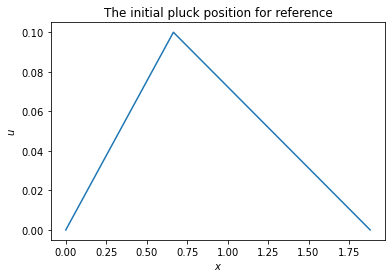

98.42264776709608


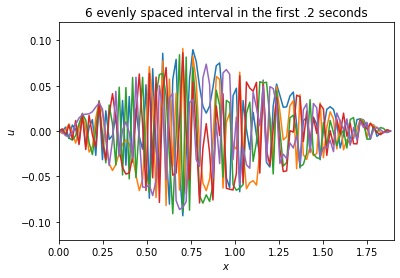

In [4]:

L=1.9
N = 100
c = 250.0
x = np.arange(0,L,L/N)  

def ureset(N,p,amp):
    npeak=int(p*N)
    u = np.zeros(N)                        # Initial plucked string
    u[:npeak]= amp*x[:npeak]/x[npeak]                 # Linear increase up to n = npeak
    u[npeak:]= amp*(x[-1]-x[npeak:])/(x[-1]-x[npeak]) # Linear decrease from n = npeak to the end
    return(u)

# Set the intial conditions, find the initial g and integrate in time

t0 = 0; t1= 2.0; nt = 200000; dt = (t1 - t0)/nt 
epsilon= 7.5e-6

# introduce the diffusion term
b = .5
D= -2*b

#to vary initial position change p value 0-1 as a decimal percent between the two edges
#to vary height change amp to desired amplitude value
p=.35;amp=.1

u = ureset(N,p,amp); g = u.copy();
plt.plot(x,u)
plt.xlabel(r'$x$'); plt.ylabel(r'$u$'); plt.title('The initial pluck position for reference')
plt.show()



v = 0.0*g
kx2= (2*np.pi*(np.arange(N) + 1)/(2*L))**2
kx4=kx2**2
print(kx2[5])
#derivative function
def deriv(g,v):
    return(np.array([v,(v*D)+(-c**2)*((kx2*g)-((epsilon*L**2)*kx4*g))]))


for t in np.arange(t0,t1+dt,dt):  # Using 4th-order Runge-Kutta
    
    k1 = dt*deriv(g,v)
    k2 = dt*deriv(g+0.5*k1[0,:],v+0.5*k1[1,:])
    k3 = dt*deriv(g+0.5*k2[0,:],v+0.5*k2[1,:])
    k4 = dt*deriv(g+k3[0,:],v+k3[1,:])
    step = (k1 + 2*k2 + 2*k3 + k4)/6
    g += step[0,:]; v += step[1,:]

    if np.abs(t-0.04) < dt/2 or np.abs(t-0.08) < dt/2 or np.abs(t-0.12) < dt/2 or \
       np.abs(t-0.16) < dt/2 or np.abs(t-0.20) < dt/2:
#         print('Plotting at t=',t)
        plt.plot(x,g)
    

#     if np.abs(t-1.95) < dt/2 or np.abs(t-1.96) < dt/2 or np.abs(t-1.97) < dt/2 or \
#        np.abs(t-1.98) < dt/2 or np.abs(t-1.99) < dt/2 or np.abs(t-2.0) < dt/2:
# #         print('Plotting at t=',t)
#         u2 = fftsinei(g,x)
#         plt.plot(x,u2)      


plt.axis([0,L,-0.12,0.12])
plt.xlabel(r'$x$'); plt.ylabel(r'$u$'); plt.title('6 evenly spaced interval in the first .2 seconds')
plt.show() 
